### **Predicción:** ¿Cúantas veces será compartido un artículo del Blog?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Importamos pandas
import pandas as pd

In [ ]:
#Cargamos los datos de entrada
data = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ2ecJo-6qlYA30-mTWPk7BRlbcI9zXrwJbDZeUIsvHHABdlqWA4R5P26-4W5GOk5EnoQlaWVoTaCEQ/pub?output=csv")

# Saber cuantas filas y columnas hay en la data
data.shape # son 161 filas y 8 columnas

(161, 8)

In [ ]:
# Veamos las primeras filas
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


Vemos que algunos campos (por ejemplo en comentarios) tienen valores nulos.

En nuestro caso la columna **Shares** será nuestra salida, es decir nuestro valor "Y", el valor que queremos predecir

In [ ]:
# Veamos una estadística de los valores
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


- Podemos decir que la media de la cantidad de palabras es de 1808.
- Existe un artículo con mínimo de 250 palabras y máximo de 8401.
- Para la salida, vemos que como mínimo es 0 veces compartido y máximo de 350000.



### Data Cleaning

In [ ]:
# Comprobar si hay valores null
data.isnull().any()

Title             False
url                True
Word count        False
# of Links        False
# of comments      True
# Images video    False
Elapsed days      False
# Shares          False
dtype: bool

In [ ]:
# La mejor manera de llenar valores NULL en un campo numérico es con el promedio
data['# of comments'].mean() # Promedio de comentarios

8.782945736434108

In [ ]:
# Remplazamos los valores NULL por el promedio de "# of comments"
data['# of comments']=data['# of comments'].fillna(data['# of comments'].mean())

In [ ]:
# Cambiar el tipo de datos de los comentarios a entero, para manejar un mismo tipo de dato
data['# of comments']=data['# of comments'].astype('int64')

In [ ]:
#Mostramos la data
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,8,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,8,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104,4,131,200000


### Visualización General

In [ ]:
# Importamos px, visualización dinámica
import plotly.express as px

In [ ]:
# HISTOGRAMA PARA WORD COUNT
px.histogram(data['Word count'], x="Word count", title="Cantidad de Palabras",color_discrete_sequence=['indianred'],text_auto=True)

Podemos observar que donde se concentran mayormente los registros para **Word count** es de 3500.

In [ ]:
# GRÁFICO HISTOGRAMA PARA COMPARTIDOS
px.histogram(data['# Shares'], x="# Shares", title="# Compartidos",color_discrete_sequence=['goldenrod'],text_auto=True)

Podemos observar que donde se concentra la mayor cantidad de registros para **# Shares** es en 80000

### Filtrar Data

In [ ]:
# Filtramos la data para trabajar con "Word count"<=3500 y "# Shares"<=80000
data_ml=data[(data['Word count']<=3500) & (data['# Shares']<=80000)]

# Mostramos los primeros registros de la data filtrada

data_ml[['Word count','# Shares']].head(10)

,Word count,# Shares
1,1742,25000
2,962,42000
5,761,21000
7,753,77000
8,1118,59400
9,1581,35000
13,256,29000
14,1267,37000
15,971,67300
16,369,60100


### Regresión Lineal Simple (SLR)
- Variable predictora (independiente): **Word count**, eje X
- Variable objetivo (dependiente): **# Shares**, eje Y

#### Correlación de variables

In [ ]:
# Correlación entre "horsepower y "price"
import scipy
from scipy import stats # importando scipy.stats
person_coef, p_value=stats.pearsonr(data_ml['Word count'], data_ml['# Shares'])
print(person_coef,p_value)
# Pearson correlation: 0.23
# P: 0.004

0.23494344600246747 0.004048967525697524


Existe una CORRELACIÓN NEGATIVA

In [ ]:
# Importamos el modelo lineal
from sklearn.linear_model import LinearRegression

In [ ]:
#Creamos un objeto de regresión lineal utilizando el constructor
lm=LinearRegression()

In [ ]:
# Definimos variable PREDICTORA y OBJETIVO
x_train=data_ml[["Word count"]]
y_train=data_ml["# Shares"]

In [ ]:
# Entrenamos el modelo
lm.fit(x_train,y_train) #para los parámetros b0 y b1

LinearRegression()

In [ ]:
# Predecir
Yhat=lm.predict(x_train)
Yhat

array([21125.61589425, 16681.44604148, 15536.21765635, 15490.63642709,
       17570.28001204, 20208.29365541, 12658.90255937, 18419.23040699,
       16732.7249244 , 13302.73742265, 14818.31329552, 20493.17633828,
       14453.66346144, 18795.27554837, 13274.24915436, 14134.59485663,
       17667.14012421, 14994.9405589 , 15684.35665144, 13599.01541284,
       17268.30436819, 16373.77274398, 18379.34683139, 16613.07419759,
       21233.87131374, 16390.86570496, 16732.7249244 , 13809.82859816,
       13809.82859816, 15655.86838315, 23051.42283044, 12624.71663742,
       21245.26662105, 14903.77810038, 17946.32515342, 16652.9577732 ,
       14772.73206626, 16299.70324644, 17450.62928523, 18390.7421387 ,
       21102.82527962, 21530.14930392, 24874.67200081, 14972.14994427,
       15758.42614899, 13291.34211534, 14089.01362737, 16852.3756512 ,
       14043.43239811, 14727.150837  , 17764.00023639, 24663.85881549,
       16829.58503658, 15524.82234903, 17456.32693889, 27136.64050279,
      

In [ ]:
# Predecir: ¿CUÁNTOS VECES SERÁ COMPARTIDO UN BLOG DE 2000 PALABRAS?
prueba=lm.predict([[2000]])
print(int(prueba))

22595


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



##### Usando la fórmula:

In [ ]:
#Obtener el INTERCEPTO (b0)
lm.intercept_

11200.30322307416

In [ ]:
#Obtener PENDIENTE (b1)
lm.coef_

array([5.69765366])

In [ ]:
# Predecir los COMPARTIDOS cuando la CANTIDAD DE PALABRAS de un blog es 2000
#Compartidos= b0 + b1*x
Compartido=lm.intercept_ + lm.coef_ * 2000
Compartido

array([22595.61053785])

#### Evaluar modelo mediante visualización

In [ ]:
# Importamos librerías necesarias
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Definimos variables para los gráficos
x=data_ml["Word count"] # predictora
y=data_ml["# Shares"] # objetivo

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(0.0, 80850.0)

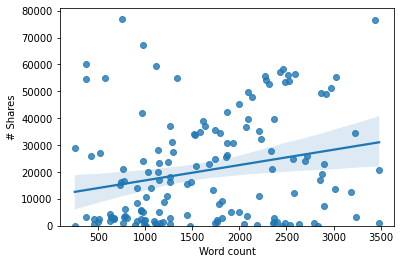

In [ ]:
# GRÁFICO DE DISPERSIÓN

sns.regplot(x, y, data=data_ml)
plt.ylim(0,)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



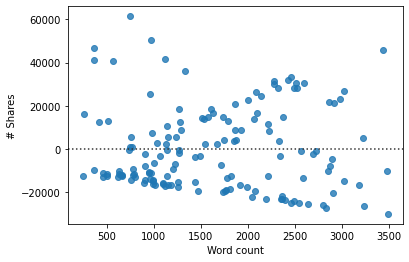

In [ ]:
# GRÁFICO RESIDUAL

sns.residplot(x, y) 
#Sintaxis: ([variables independientes], [variables dependientes])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



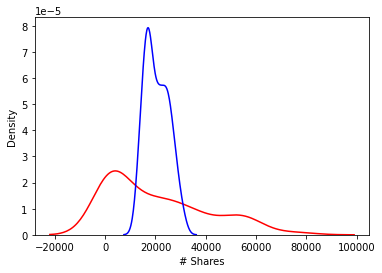

In [ ]:
# GRÁFICO DE IDSTRIBUCIÓN

# Compara el valor predicho frente al valor real.

ax1= sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values", ax=ax1)

# Podemos observar que la predicción no está siendo precisa con la variable independiente

**Podemos observar que no existe una CORRELACIÓN y los valores predichos no son precisos con respecto a los valores reales**.
- Se debe tomar más **variables predictoras** para un mejor modelo.

### Regresión lineal múltiple (MLR)
- Una variable objetivo : **# Shares**
- Dos o más variable predictoras: **Word count, # of Links, # of comments, # Images video**

In [ ]:
# Ajustar Modelo
# Creamos una variable y extraemos las 4 variables predictoras
z=data_ml[['Word count','# of Links','# of comments','# Images video']]

In [ ]:
# Entrenamos el modelo
lm.fit(z,data_ml['# Shares']) #(variables_predictoras,variable_objetivo)

LinearRegression()

In [ ]:
# Obtener predicción
Yhat_mul=lm.predict(z)
Yhat_mul

array([13316.56454415, 19739.66923589, 20005.46691477, 19784.75544252,
       21389.47198993, 22355.42793115, 13793.75270645, 19037.42303995,
       16693.56957848, 14653.16282102, 17757.23623435, 14306.83029653,
       16900.67825129, 16660.49710629, 13981.62212287, 13045.4122    ,
       19928.32587993, 16538.60060427, 19538.01967413, 16861.44016115,
       19815.87886633, 20025.21562832, 21058.56082359, 18427.60542148,
       -5754.23814863, 13989.83271902, 17924.97265382, 17696.85704337,
       15654.95253017, 16863.75945812, 24617.9196655 , 14788.48420161,
       22807.77426893, 13628.96504369,  4516.46959276, 17070.23452416,
       15342.47923198, 19637.06059034, 21253.04635377,  8623.97514563,
        2535.42520351, 19607.35432737, 15242.92565857, 15107.06542674,
       16346.46281814, 15107.78527308, 12736.45318865,  7902.83399947,
       12983.35708619, 15178.13250059, 16591.31182537, 25222.31121621,
       22246.65401533, 11720.00962077, 16240.50304667,  -141.1669292 ,
      

In [ ]:
# Predecir, ¿CUÁNTOS COMPARTIDOS TENDRÁ UN BLOG DE 2000 PALABRAS, CON 10 ENLACES, 4 COMENTARIOSY 6 IMAGENES?
prediccion=lm.predict([[2000,10,4,6]])
print(int(prediccion))

18462


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



### Evaluación del modelo mediante visualización

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



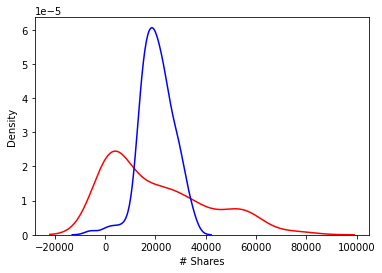

In [ ]:
ax1= sns.distplot(data_ml["# Shares"], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat_mul, hist=False, color="b", label="Fitted Values", ax=ax1)

Podemos observar que aún los valores predichos con respecot a lso valores reales no son precisos.
- Se necesitará ajustar el modelo.

### Canalización
- Podemos simplificar nuestro código con una librería de canalización.
- Hay muchas formas de obtener una predicción, mediante: Normalización, transformación polinomial y regresión lineal.


In [ ]:
# Importamos los módulos necesarios
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
# El primer elemento de la tupla contiene el nombre del estimador: modelo.
# El segundo elemento contiene el constructor de modelos.
Input=[('scale', StandardScaler()),('polynomial', PolynomialFeatures(degree=2)),('model', LinearRegression())]

In [ ]:
# Inresar la lista en el constructor de canalización
pipe=Pipeline(Input)

In [ ]:
# Entrenar canalización
x_predict= data_ml[['Word count','# of Links','# of comments','# Images video']]
y= data_ml['# Shares']
pipe.fit(x_predict,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

In [ ]:
# Predecir
Yhat_pipe=pipe.predict(x_predict[['Word count','# of Links','# of comments','# Images video']])
Yhat_pipe

array([13999.2636105 , 16551.30931175, 24488.18831486, 15037.43799686,
       25909.05288681, 25954.10696825, 16913.58647116, 21952.93730067,
       19180.90908242, 17130.77448505, 12298.69583017, 12745.40842102,
       20222.09276785, 18961.99331334, 15742.52741371, 12219.4299253 ,
       17729.4985466 ,  8312.14447684, 15124.78700617, 20100.50055881,
       23605.69992567, 24351.71336138, 22809.3085739 , 21883.66915561,
         576.16594542,  7991.55178706, 21167.47147979,  8742.50574215,
        5382.63977134, 17974.89077091, 23411.93301146,  6494.51482561,
        4794.49709993,  6644.84369967, -2453.15984581, 19805.40358578,
       12687.82127753, 25917.62604969, 25760.79846201,  7033.75022623,
        4422.2604061 , 22057.86696945, 12387.04637703, 16185.06502889,
       19153.79346557, 17731.98933141, 16646.10278894, -3503.05085735,
       12262.49258014, 13854.31322064, 19084.51431134, 27428.836116  ,
       18797.63828867,  9332.38474716, 18683.17434408,   951.71469396,
      

In [ ]:
# Predecir: ¿CUANTOS COMPARTIDOS TENDRÁ UN BLOG CON 1000 PALABRAS, CON 15 ENLACES, 10 COMENARIOS Y 8 IMÁGENES?
predict_pipe=pipe.predict([[1000,15,10,8]])
print(int(predict_pipe))

7231


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



Observamos que la predicción es razonable pero en la evaluación por visualización aún es imprecisa la predicción.

### Evaluación del Modelo mediante **división de conjuntos**
- Nos dice cómo funciona nuestro modelo en el mundo real.
- **Se debe dividir nuestros datos, usar los datos In-sample o los datos de entrenamiento para entrenar el modelo**
- **El resto de los datos, denominados datos de prueba, se utilizan fuera de la muestra**
- Los datos de prueba se utilizan para aproximar cómo se comporta el modelo en el mundo real.
- Separar los datos en conjuntos de entrenamiento y prueba es una parte importante de la evaluación.


In [ ]:
# La mayor parte se utilizan para el conjunto de datos de entrenamiento, por ejemplo: 70%
# La menor parte se utilizan para el conjunto de datos de prueba, por ejemplo 30%

#### Dividir conjunto de datos con la función "train_test_split()"

In [ ]:
# Importamos librería necesaria
from sklearn.model_selection import train_test_split

In [ ]:
#Obtener datos de entrenamiento y prueba
x_data= data_ml[['Word count','# of Links','# of comments','# Images video']] # variables predictoras
y_data=data_ml["# Shares"] # variable objetivo

# x_train, y_train: subconjuntos para el entrenamiento
# x_test, y_test: subconjuntos para la prueba

# test_size= Es el tamaño de la prueba, como lo definimos como 30% = 0.3
# random_state: objeto que controla la aleatorización durante la división

x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,random_state=0)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



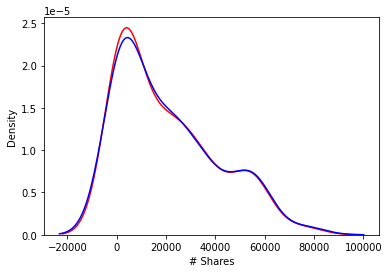

In [ ]:
# GRÁFICO DE REGRESIÓN - TRAIN
ax1= sns.distplot(y_data, hist=False, color="r", label="Actual Value")
sns.distplot(y_train, hist=False, color="b", label="Predicted Values", ax=ax1)

Podemos observar que los valores predichos y valores reales son muy precisos con valores aleatorios.
- Uso del conjunto de datos de entrenamiento.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



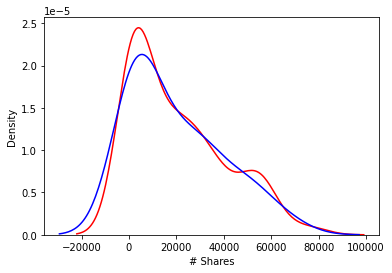

In [ ]:
# GRÁFICO DE REGRESIÓN - TEST
ax1= sns.distplot(y_data, hist=False, color="r", label="Actual Value")
sns.distplot(y_test, hist=False, color="b", label="Predicted Values", ax=ax1)

Podemos observar que los valores predichos con respecto a los valores reales varían un poco en comparación con el conjunto de datos de entrenamiento.
- Uso del conjunto de datos de prueba

### EL MODELO ES VÁLIDADO CORRECTAMENTE